<img src="img/usmlogo.png" style="float:right;height:100px">
<img src="img/dilogo.png" style="float:left;height:100px">
<center>
    <h1> Laboratorio 1 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Cristian Navarrete ; 201573549-2 ; INF-280 </h4>
    <h4> Sebastian Rosales ; 201473604-5 ; INF-280 </h4>
</center>
<p>
<center><h4>_05/10/2018_</h4></center>
</p>

## 1. Sección Introductoria 

>**Esta sección no influye en la nota de este laboratorio y puede obviarla en la entrega de su laboratorio. A EXCEPCIÓN DE LA PREGUNTA 6 DE ESTA SECCIÓN** 

Esta sección tiene como objetivo guiar en la elaboración de su notebook; un buen primer paso es conocer la sintaxis que markdown facilita [disponible aqui](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).
Otro buen paso es manejarse con funcionalidades básicas de jupyter notebook [disponible aqui](https://youtu.be/HW29067qVWk). También puede usar el código del header para el encabezado de su laboratorio(por eso tiene los campos para rellenar).

Consideraciones que se deben tener a la hora de realizar el laboratorio:
1. Lenguaje Formal, ser lo más objetivo posible. Obviamente algunos puntos serán subjetivos pero intente que sean válidos.
2. Todo apoyo visual (tabla, gráfico,etc) debe tener una breve explicación de lo que representa, para los gráficos no olvide rotular los ejes con un nombre explicativo (no X e Y, si no lo que representan X e Y).
3. No entregue las preguntas con "print", puede hacer print del resultado pero debe mencionarlo formalmente en una celda markdown, las respuestas que solamente estén en prints no serán aceptadas. Recuerde que se debe mantener un aspecto formal.
4. Markdown permite escribir ecuaciones de una forma similar a lo que se hace en LaTeX. En caso de ser necesario, las ecuaciones deben estar escritas en este formato. Correcto: $r^{2} = x^{2}+y^{2} $. Incorrecto: r^2 = x^2 + y^2.
5. Cada laboratorio tiene una sección de "Reglas del juego" las que varían levemente entre cada laboratorio, se recomienda leerlas siempre para que no hayan problemas, asi como también el comentario introductorio de laboratorio (Hubo muchos alumnos quienes tuvieron descuentos por formalismos que se solucionaban si leían estas secciones).
6. Como comentario general, describir un gráfico no es lo mismo que analizarlo y obtener información a partir de este. 

### Trabajo en Clases

 En esta parte se trabajarán con dos datasets "vgsales.csv" y "pokemon.csv"

Una breve explicación de los datasets:

**vgsales.csv**

Un dataset que trata sobre las ventas de varios videojuegos en distintas regiones

* Rank : ranking del juego
* Name : nombre del juego
* Platform : Plataforma (consola) en la que está el juego 
* Year : año de publicación
* Genre : género del juego
* Publisher : Quién lo publica 
* NA_Sales : Ventas en la región de Norteamérica
* EU_Sales : Ventas en la región de Europa
* JP_Sales : Ventas en la región de Japón
* Other_Sales : Ventas en otras regiones
* Global_Sales : Ventas globales

**pokemon.csv**

Un dataset que abarca atributos de los pokemon de primera a sexta generación

* Number : Número que le corresponde al pokemon
* Name : Nombre del pokemon
* Type_1 : Tipo primario del pokemon
* Type_2 : Tipo secundario del pokemon
* Total : Suma de los stats del pokemon, qué tan fuerte es
* HP : Stats de los puntos de vida 
* Attack : Stats de los puntos de ataque
* Defense : Stats de los puntos de defensa
* Sp_Atk : Stats de los puntos de ataque especial
* Sp_Def : Stats de los puntos de defensa especial
* Speed : Stats de los puntos de velocidad
* Generation : A que generación pertenece 
* isLegendary : Indica si es legendario o no
* Color : El color principal del pokemon
* hasGender : Indica si tiene sexo (M o F) o es asexuado
* Pr_Male : Probabilidad de que sea macho 
* Egg_Group_1 : Tipo huevo 1 
* Egg_Group_2 : Tipo huevo 2
* hasMegaEvolution : Indica si el pokemon puede mega evolucionar o no
* Height_m : Altura del pokemon en metros.
* Weight_kg : Pero del pokemon en kilogramos
* Catch_Rate : Indica el ratio de captura 
* Body_Style : Indica la forma corporea del pokemon


1. ¿En qué región le va mejor a nintendo en cuanto a ventas realizadas?

In [1]:
mydata = read.csv("vgsales.csv") 
regiondata = subset(mydata[5:10], Publisher=='Nintendo')
ventas_na = sum(regiondata$NA_Sales)
ventas_eu = sum(regiondata$EU_Sales)
ventas_jp = sum(regiondata$JP_Sales)
ventas_other = sum(regiondata$Other_Sales)

acumulado <- matrix(c(ventas_na,ventas_eu,ventas_jp,ventas_other),ncol=1,byrow=TRUE)
colnames(acumulado) <- c("Sumado")
rownames(acumulado) <- c("Ventas NA","Ventas EU","Ventas JP", "Ventas Otros")
acumulado <- as.table(acumulado)
acumulado

             Sumado
Ventas NA    816.87
Ventas EU    418.74
Ventas JP    455.42
Ventas Otros  95.33

La región con mayor cantidad de ventas es Norte America con 816 

2. Determine la plataforma más popular en cada región.

3. Si elijo un pokemon al azar qué probabilidad tengo de que sea monotipo o sea tipo tierra ya sea en el tipo primario o secundario?

4. ¿Cuántos pokemones que no son legendarios son más fuertes que un legendario?

5. Compare cuantitativamente el poder de cada tipo (primario). Utilice un método gráfico y responda a partir de lo observado

## **Pregunta con Puntaje (obligatoria)** 

6. ¿Cuál es la probabilidad de que, al elegir dos pokemon al azar estos puedan tener un hijo? Trabaje solamente con los pokemon que no son legendarios.

**Asuma** que para que puedan tener un hijo deben de tener algún grupo huevo en común y deben ser de sexos distintos (es decir, solamente verificar si puede haber un padre y una madre). Existen pokemones asexuados.


In [2]:
# Toma alrededor de 1 minuto en computar.

pokemones = read.csv("pokemon.csv") 

# Pokemones no Legendarios
pnl = subset(pokemones, isLegendary=='False')

puedenTener = 0
noPueden = 0

getpokemon <- function(){
    return(sample(0:nrow(pnl),1))
}
n=100000
for(i in 1:n){ #lo haremos n veces
    pokemon1 = getpokemon()
    pokemon2 = getpokemon()
       
    p1_egg_1 = toString(pnl[pokemon1, "Egg_Group_1"])
    p2_egg_1 = toString(pnl[pokemon2, "Egg_Group_1"])
    
    p1_egg_2 = toString(pnl[pokemon1, "Egg_Group_2"])
    p2_egg_2 = toString(pnl[pokemon2, "Egg_Group_2"])

  
    if(toString(pnl[pokemon1, "hasGender"]) == "True" && toString(pnl[pokemon2, "hasGender"]) == "True") {
         if(p1_egg_1 == p2_egg_1 || p1_egg_1 == p1_egg_2 || p1_egg_2 == p2_egg_1 || p1_egg_2 == p2_egg_2) {
             if((pnl[pokemon1, "Pr_Male"] == 1 && pnl[pokemon2, "Pr_Male"]) != 1 || (pnl[pokemon1, "Pr_Male"] == 0 && pnl[pokemon2, "Pr_Male"] != 0) || (pnl[pokemon2, "Pr_Male"] == 1 && pnl[pokemon1, "Pr_Male"] != 1) || (pnl[pokemon2, "Pr_Male"] == 0 && pnl[pokemon1, "Pr_Male"] != 0) ) {
                 puedenTener = puedenTener + 1
             }
        }
    }
            
}
print("Probabilidad")
print((puedenTener/n) *100)

[1] "Probabilidad"
[1] 50.737


La probabilidad de que dos pokemones elegidos al azar puedan tener un hijo es de aproximadamente 50,8%

## 2. Atletas 

En esta sección se trabajará con un dataset que tiene registros de competencias deportivas en las que han participado varios atletas. A continuación, se presenta una descripción de las columnas

**atletas.csv**
* ID : id de la participación
* Name : nombre del participante
* Sex : sexo del atleta
* Age : edad del participante
* Height : altura del participante 
* Weight : peso del atleta
* Team : equipo al que pertenece el atleta
* NOC : comité nacional olímpico
* Games : en qué juego participó 
* Year : año del evento
* Season : temporada en la que participó 
* City : ciudad del evento
* Sport : deporte en el que compitió
* Event : nombre del evento
* Medal : tipo de medalla

Las preguntas a responder en esta sección son:

1. Busque en el dataset si hay valores NA en alguna columna y explique qué pueden representar.


In [31]:
atletas = read.csv("atletas.csv") 
summary(atletas)

       ID                               Name        Sex             Age       
 Min.   :     1   Robert Tait McKenzie    :    58   F: 74522   Min.   :10.00  
 1st Qu.: 34643   Heikki Ilmari Savolainen:    39   M:196594   1st Qu.:21.00  
 Median : 68205   Joseph "Josy" Stoffel   :    38              Median :24.00  
 Mean   : 68249   Ioannis Theofilakis     :    36              Mean   :25.56  
 3rd Qu.:102097   Takashi Ono             :    33              3rd Qu.:28.00  
 Max.   :135571   Alexandros Theofilakis  :    32              Max.   :97.00  
                  (Other)                 :270880              NA's   :9474   
     Height          Weight                 Team             NOC        
 Min.   :127.0   Min.   : 25.0   United States: 17847   USA    : 18853  
 1st Qu.:168.0   1st Qu.: 60.0   France       : 11988   FRA    : 12758  
 Median :175.0   Median : 70.0   Great Britain: 11404   GBR    : 12256  
 Mean   :175.3   Mean   : 70.7   Italy        : 10260   ITA    : 10715  
 3r

Sí, en las columnas correspondientes a Age, Height, Weight y Medal. El NA en las columnas Age, Height, Weight y Medal puede representar de manera respectiva la falta de información acerca de la edad, la altura, el peso y las medallas obtenidas por los participantes.

Respecto a la columna Medals, esta falta de información puede atribuirse a que el participante no obtuvo ninguna medalla. En las columnas restantes (Age, Height y Weight), esta falta de información puede atribuirse a que no fueron medidas o son desconocidas.

2. Si es que se puede, reemplace los valores NA por algún campo que le de mayor sentido (Con esto se refiere a si hay algo que le de más sentido, no si se puede en código).


In [32]:
# Reemplazo de los valores NA de la columna "Medals"
levels(atletas$Medal) <- c(levels(atletas$Medal), "Ninguna") 
atletas$Medal[is.na(atletas$Medal)] <- "Ninguna"

# Reemplazo de los valores NA de la columna "Age"
levels(atletas$Age) <- c(levels(atletas$Age), "Desconocida") 
atletas$Age[is.na(atletas$Age)] <- "Desconocida"

# Reemplazo de los valores NA de la columna "Weight"
levels(atletas$Weight) <- c(levels(atletas$Weight), "Desconocida") 
atletas$Weight[is.na(atletas$Weight)] <- "Desconocida"

# Reemplazo de los valores NA de la columna "Height"
levels(atletas$Height) <- c(levels(atletas$Height), "Desconocida") 
atletas$Height[is.na(atletas$Height)] <- "Desconocida"

#Se procede a mostrar los cambios realizados.
atletas

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Ninguna
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Ninguna
3,Gunnar Nielsen Aaby,M,24,Desconocida,Desconocida,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Ninguna
4,Edgar Lindenau Aabye,M,34,Desconocida,Desconocida,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Ninguna
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",Ninguna
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,Ninguna
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",Ninguna
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,Ninguna
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",Ninguna


3. **O:** ¿En qué temporada hay una mayor participación femenina? ¿Hay alguna diferencia significativa entre los grupos?


4. **O:** ¿Cuáles son los deportes con: mayor/menor participación masculina y mayor/menor participación femenina?


5. Elabore un gráfico (que usted encuentre pertinente) para comparar la cantidad de medallas obtenidas por hombres y mujeres. Concluya a partir de lo observado.


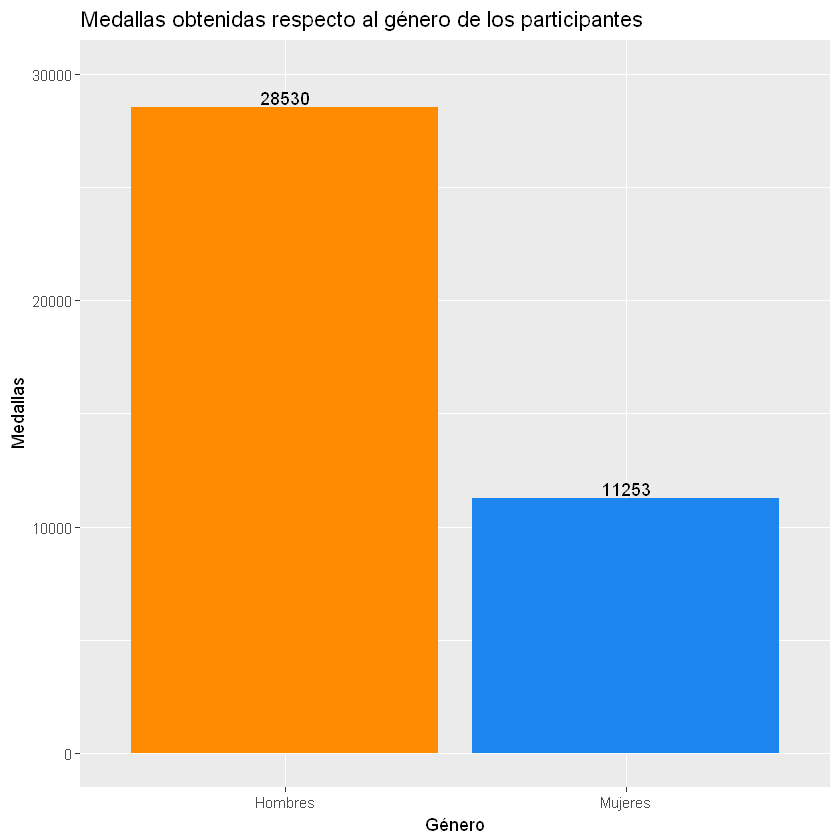

In [33]:
#subset hombres
hombres = subset(atletas, Sex=="M")
medallas_hombres = subset(hombres, Medal!="Ninguna")

#subset mujeres
mujeres = subset(atletas, Sex=="F")
medallas_mujeres = subset(mujeres, Medal!="Ninguna")


# Create data & library importation
library(ggplot2)
data=data.frame(Genero=c("Hombres","Mujeres") ,  Medallas=c(nrow(medallas_hombres), nrow(medallas_mujeres)))

# Barplot
ggplot(data, aes(x=Genero, y=Medallas, fill = Genero))+ ggtitle("Medallas obtenidas respecto al género de los participantes") + geom_bar(stat = "identity") + labs(x = "Género", y = "Medallas")  + theme(legend.position = "none") + scale_fill_manual("legend", values = c("Hombres" = "darkorange", "Mujeres" = "dodgerblue2")) + geom_text(aes(label=Medallas), position=position_dodge(width=0.9), vjust=-0.25) + ylim(0, 30000)


Del gráfico es posible observar que los hombres ganaron más del doble de medallas que las mujeres en las competencias deportivas.

6. Elabore un gráfico (que usted encuentre pertinente) para comparar la edad de los participantes en eventos de temporada de verano y temporada de invierno. ¿Qué puede decir a partir de lo que observa?


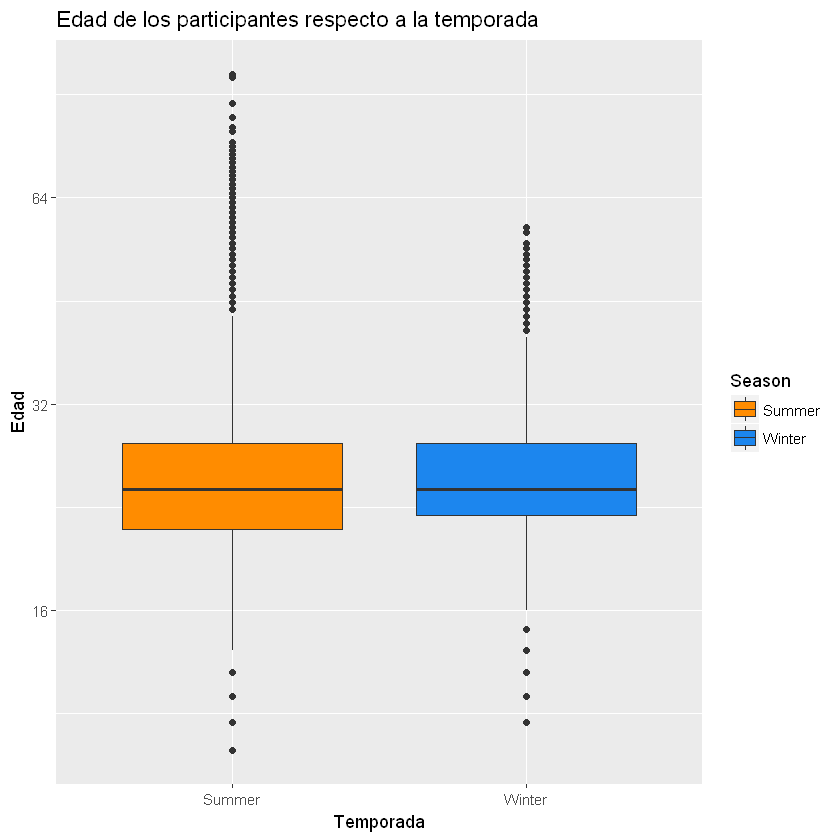

In [41]:
# subset of age.
datos = subset(atletas, Age != "Desconocida")
datos$Age <- as.numeric(datos$Age)
library(scales)

#boxplot
ggplot(datos, aes(x=factor(Season), y=Age, fill=Season))+ ggtitle("Edad de los participantes respecto a la temporada") + 
    geom_boxplot() + 
    xlab("Temporada") + ylab("Edad") + scale_y_continuous(trans = log2_trans()) + 
    scale_fill_manual(values=c("darkorange","dodgerblue2"))
 

Del gráfico no es posible observar alguna diferencia apreciable, por lo tanto solo se puede concluir que en ambas temporadas (invierno y verano) el rango etario de las personas que participan es bastante similar. Esto debido a que las cajas se solapan, y las medianas de las cajas son bastante similares (se encuentran a la misma altura).

No se puede observar ninguna diferencia que indique que el rango etario de los participantes en las temporadas de verano e invierno varíe apreciablemente.


Si quisieramos calcular un valor llamado *"desempeño"* de la siguiente forma: 

$$ D = 3\cdot Oro + 2\cdot Plata + Bronze $$
7. ¿Cuál sería el top 10 de los equipos con mayor desempeño? 



In [47]:
# demora alrededor de 1 minuto en computar

# se selecciona la informacion relevante para calcular el desempeño.
selection <- data.frame(atletas$Team, atletas$Medal)
selection <-selection[order(selection$atletas.Team),]

# se busca la cantidad de "teams" distintos y se crea un vector para indexarlos.
team <- as.vector(unique(selection$atletas.Team))
index <- c(1:length(team))

# se indexan los "teams"
names(index) <- team

# vector para calcular el desempeño
score <- c(rep(0,length(team)))

# se calcula el desempeño
for(row in 1:nrow(selection)){

    country <- selection$atletas.Team[row]
    comparator <-selection$atletas.Medal[row]

    indexer <- index[[country]]

    if(comparator == "Gold"){
        score[indexer] <- score[indexer] + 3
    }

    else if (comparator == "Silver"){
        score[indexer] <- score[indexer] + 2
    }

    else if (comparator == "Bronze"){
        score[indexer] <- score[indexer] + 1
    }
}

# se procede a buscar el top 10 de los equipos con mayor desempeño
# despues de encontrar cada posicion.
one <-which.max(score)
team_one <- team[one]
one_score <-score[one]

# asignar el score al mínimopara encontrar el siguiente equipo.
score[one] <- 0

two <-which.max(score)
team_two <- team[two]
two_score <-score[two]
score[two] <- 0

three <-which.max(score)
team_three <- team[three]
three_score <-score[three]

# asignar el score al mínimopara encontrar el siguiente equipo
score[three] <- 0

four <-which.max(score)
team_four <- team[four]
four_score <-score[four]

# asignar el score al mínimopara encontrar el siguiente equipo
score[four] <- 0

five <-which.max(score)
team_five <- team[five]
five_score <-score[five]

# asignar el score al mínimopara encontrar el siguiente equipo
score[five] <- 0

six <-which.max(score)
team_six <- team[six]
six_score <-score[six]

# asignar el score al mínimopara encontrar el siguiente equipo
score[six] <- 0

seven <-which.max(score)
team_seven <- team[seven]
seven_score <-score[seven]

# asignar el score al mínimopara encontrar el siguiente equipo
score[seven] <- 0

eight <-which.max(score)
team_eight <- team[eight]
eight_score <-score[eight]

# asignar el score al mínimopara encontrar el siguiente equipo
score[eight] <- 0

nine <-which.max(score)
team_nine <- team[nine]
nine_score <-score[nine]

# asignar el score al mínimopara encontrar el siguiente equipo
score[nine] <- 0

ten <-which.max(score)
team_ten <- team[ten]
ten_score <-score[ten]

# vector que contiene el top 10 de los equipos con mayor desempeño.
team_vector <- c(team_one, team_two, team_three, team_four, team_five,
 team_six, team_seven, team_eight, team_nine, team_ten)

# vector que contiene el desempeño del top 10 de los equipos.
team_score <- c(one_score, two_score, three_score, four_score, five_score,
 six_score, seven_score, eight_score, nine_score, ten_score)

# se procede a mostrar el top 10 .
data.frame(Team = team_vector, Performance = team_score)

Team,Performance
United States,11679
Soviet Union,5283
Germany,3969
Great Britain,3293
Italy,3105
France,2978
Sweden,2812
Canada,2500
Australia,2443
Hungary,2321


El top 10 de los equipos con mayor desempeño sería el siguiente:
1. United States
2. Soviet Union
3. Germany
4. Great Britain
5. Italy
6. France
7. Sweden
8. Canada
9. Australia
10. Hungary

## 3. Simulación


Un colega suyo quiere implementar un reproductor MP3 cuya función de reproducción aleatoria funciona de la siguiente forma: Dada una lista de canciones (asuma que cada una tiene un ID distinto) el reproductor va a seleccionar una canción al azar de la lista y la va a colocar, este proceso lo va a repetir hasta que todas las canciones hayan salido al menos 1 vez; tenga en cuenta que puede repetir una canción en el proceso. 

Su colega le ha pedido que haga un análisis del promedio del largo de la lista aleatoria en función del largo de la lista y un análisis de la varianza de los largos de la lista aleatoria en función del largo de la lista. Como su colega se marea viendo solamente números le ha pedido, además, que se lo explique de una forma gráfica. 

> Recomendaciones: No utilice largos muy grandes en un inicio, recuerde que hay tiempo de cómputo involucrado, aumente gradualmente hasta un valor util, también considere que está trabajando con una lista de reproducción de música, es poco probable que una persona tenga listas de 1000 canciones y así.

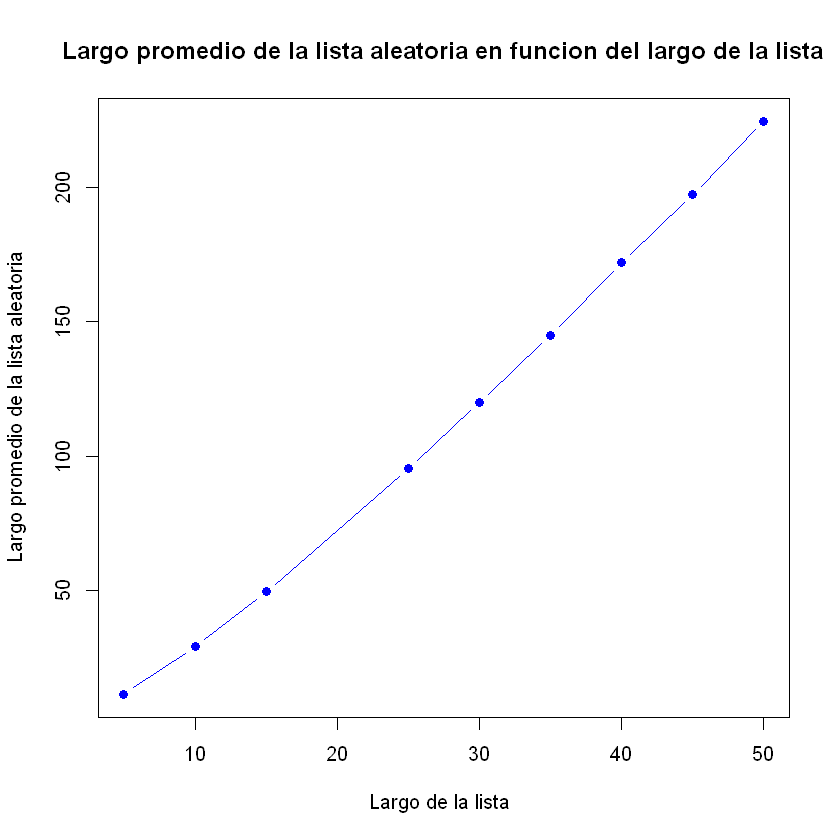

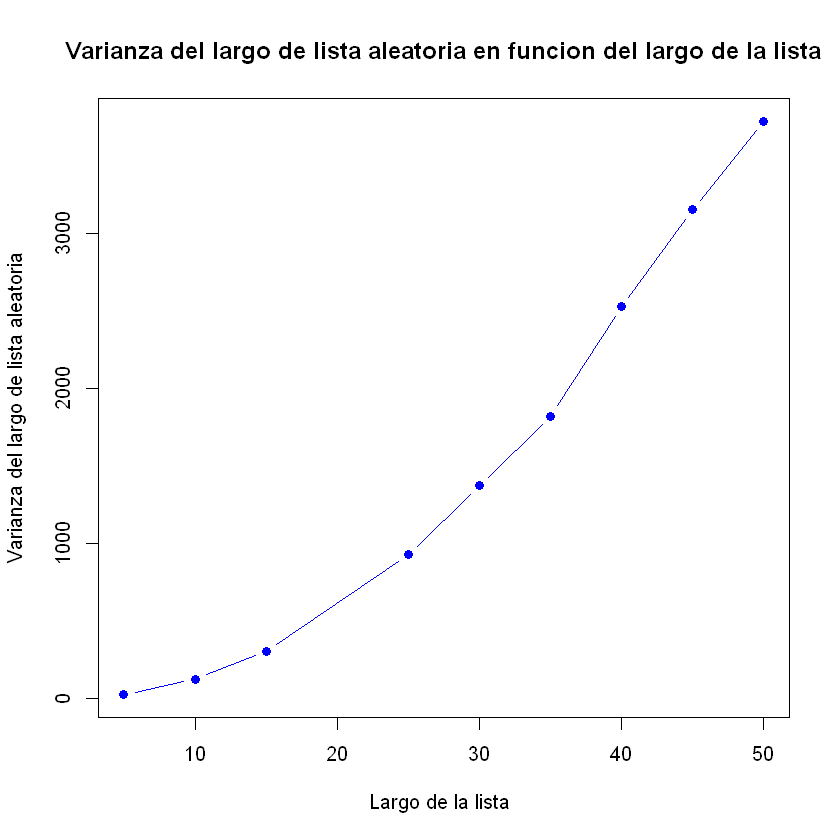

In [8]:
number_simulations <- 10000

list_size <- c(5,10,15,25,30,35,40,45,50)
mean_values <- c(0,0,0,0,0,0,0,0,0)
var_values <- c(0,0,0,0,0,0,0,0,0)

iterator <- 1
for(size in list_size){

    mp3_id <- c(1:size)
    particular_length <- c(rep(0,number_simulations))

    for(simulations in 1:number_simulations){

        songList_size <- size
        playList_size <- 0
        been_selected <- c(rep(0,songList_size))

        while (songList_size != 0){
        
            value <- sample(mp3_id, 1, TRUE)

            if(been_selected[value] == 0){

                been_selected[value] <- 1
                songList_size <- songList_size - 1
                playList_size <- playList_size + 1
            }
            else{
                playList_size <- playList_size + 1
            }
        }

        particular_length[simulations] <- playList_size
    }

    mean_values[iterator] <- mean(particular_length)
    var_values[iterator] <-var(particular_length)
    iterator <- iterator + 1
}

x <- list_size
y <- mean_values
axis_1 <-range(y)

plot(x, y, type = "b", ylim=c(axis_1[1],axis_1[2]), pch = 19,  col = "blue", xlab = "Largo de la lista ", 
    ylab = "Largo promedio de la lista aleatoria", main = "Largo promedio de la lista aleatoria en funcion del largo de la lista")

y <- var_values
axis_2 <-range(y)

plot(x, y, type = "b", ylim=c(axis_2[1],axis_2[2]), pch = 19,  col = "blue", xlab = "Largo de la lista ", 
    ylab = "Varianza del largo de lista aleatoria", main = "Varianza del largo de lista aleatoria en funcion del largo de la lista")
